In [1]:
import sqlite3 as sq
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'c:\\Users\\Hessel Voortman\\OneDrive - Hessel Voortman EC BV\\20 Werk\\2022_014 - paper sea level and tide\\Scripts'

In [3]:
os.listdir('../Results/')

['result_2012 - manual.xlsx', 'result_2012.xlsx', 'select_constit.db']

In [4]:
cnxn = sq.connect(r'../results/select_constit.db', detect_types = True)

In [5]:
sql = (
    'SELECT * FROM results '
    'WHERE name IN ('
    '"Delfzijl", ' 
    '"Harlingen", '
    '"Den Helder", '
    '"IJmuiden Noordersluis", '
    '"Hoek van Holland", '
    '"Vlissingen" '
    ')'
)
df = pd.read_sql(sql, cnxn)

In [6]:
df.columns

Index(['index', 'name', 'count', 'constits', 'N_const', 'Rsq', 'p'], dtype='object')

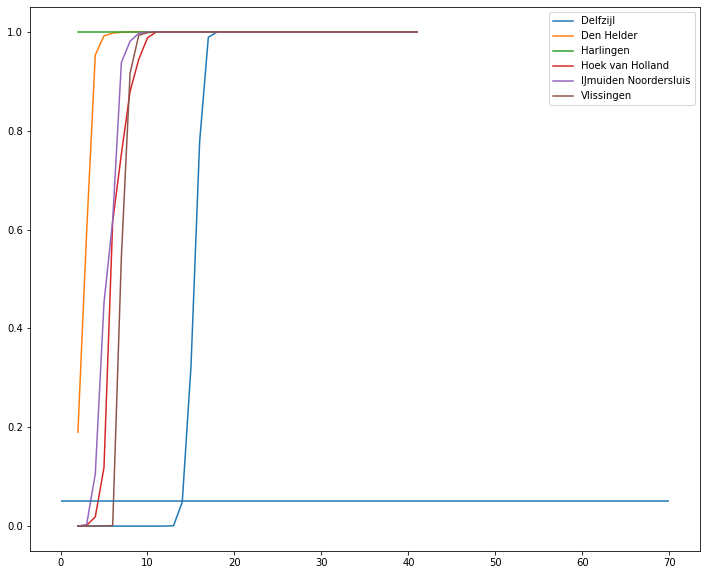

In [7]:
plt.figure(figsize = (12,10))

df.groupby('name').apply(
    lambda df: plt.plot(df['N_const'], df['p'], label = df['name'].unique()[0])
)
plt.legend();
#plt.yscale('log')
plt.hlines(xmin = 0, xmax = 70, y = 0.05);

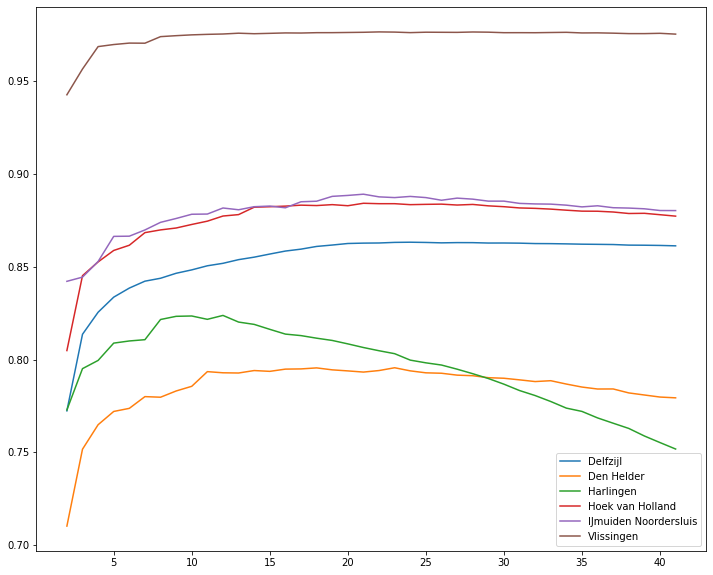

In [8]:
plt.figure(figsize = (12,10))

df.groupby('name').apply(
    lambda df: plt.plot(df['N_const'], df['Rsq'], label = df['name'].unique()[0])
)
plt.legend();

In [9]:
df[df['p'] < 0.05].groupby('name').last().to_excel(r'../results/result_1902.xlsx')

In [17]:
res = df[df['p'] < 0.05].groupby('name').last()
res

,index,count,constits,N_const,Rsq,p
name,,,,,,
Delfzijl,12,4280.0,"['M2', 'S2', 'N2', 'MU2', 'M4', '2MS6', 'L2', ...",14.0,0.855125,0.048776
Hoek van Holland,122,2000.0,"['M2', 'M4', 'MS4', 'M6']",4.0,0.852561,0.018705
IJmuiden Noordersluis,161,1411.0,"['M2', 'M6', 'S2']",3.0,0.844374,0.003008
Vlissingen,204,1410.0,"['M2', 'S2', 'M6', 'N2', 'MS4', 'NU2']",6.0,0.970367,0.000906


In [11]:
res.dtypes

index         int64
count       float64
constits     object
N_const     float64
Rsq         float64
p           float64
dtype: object

In [12]:
res['constits']

name
Delfzijl                 ['M2', 'S2', 'N2', 'MU2', 'M4', '2MS6', 'L2', ...
Hoek van Holland                                 ['M2', 'M4', 'MS4', 'M6']
IJmuiden Noordersluis                                   ['M2', 'M6', 'S2']
Vlissingen                          ['M2', 'S2', 'M6', 'N2', 'MS4', 'NU2']
Name: constits, dtype: object

In [13]:
res.loc['Delfzijl', 'constits']

"['M2', 'S2', 'N2', 'MU2', 'M4', '2MS6', 'L2', 'NU2', 'SSA', 'MM', 'MS4', 'O1', 'MSM', 'M6']"

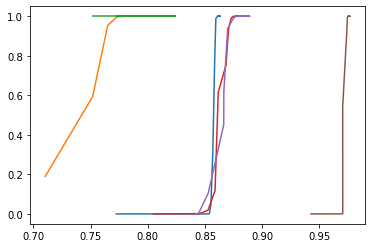

In [14]:
df.groupby('name').apply(
    lambda df: plt.plot(df['Rsq'], df['p'])
);